# Уравнение Дини для процеса фокусировки загрязненного потока житкости

<p>Добрый день, Олег Маркович. В этом документе попытаюсь смоделировать уравнение Улисса Дини для электромагнитного фокусирования загрязнений потока житкости. Я буду использовать Jupyter Notebook, специальную среду, где можно соединять форматированный текст и исполняемый код программы. Такая форма представления очень удобна для небольших программ, что используются в научных целях. Главное удобство в том, что здесь я могу вкратце для себя же описать уравнение и здесь же написать и исполнить код программы не переключаясь между документами. К тому же если я правильно разверну этот документ на сервере, то вы сможете лично проверить правильность построения модели и протестировать работу программы. Что также очень удобно.</p>
<p>Если вы не против, начну просто с канонической поверхности Дини и ее геометрического представления. Я здесь буду писать разные определения, которые могут показаться банальными и элементарными. Подобные вещи я буду писать просто для себя чтобы самому разбираться в процесе моделирования.</p>
<p>Согласно <a href="https://web.archive.org/web/20070411211617/http://public.kitware.com/VTK/pdf/VTKParametricSurfaces.pdf">[1]</a>, поверхность Дини - это поверхность с постоянной отрицательной Гауссовой кривизной, которая может быть создана путем скручивания "псевдосферы". В отличии от "псевдосферы", обычная сфера имеет положительную Гауссовую кривизну. Описывается поверхность Дини следующей системой уравнений<a href="http://mathworld.wolfram.com/DinisSurface.html">[2]</a>:</p>
$$
x=a\ cos\ u\ sin\ v
$$
$$
y = a\ sin\ u\ sin\ v
$$
\begin{equation*}
z = a\ \{ cos\ v\ + ln\ [\ tan( \frac{1}{2} v\ ) ]\  \} + b\ u\
\end{equation*}

<p> В отличии от обычного параметрического уравнения конуса, в котором присутствуют три постоянных a, b и с: В уравнении Дини постоянных лишь две, так как <b> если поверхность конуса является конусом вращения, то параметры b и с - равны между собой</b> <a href="http://bookzooka.com/book/731-ploskie-i-prostranstvennye-krivye-poverxnosti-metodicheskie-razrabotki-vi-ikryannikov/11-31-poverxnosti-vtorogo-poryadka.html">[3]</a>.</p> <p> Попробую смоделировать даную систему уравнений в каноничном виде: </p>

In [34]:
# Здесь можно менять значения констант a и b, чтобы узнать как при этом изменится форма спирали
a = 1
b = 0.2

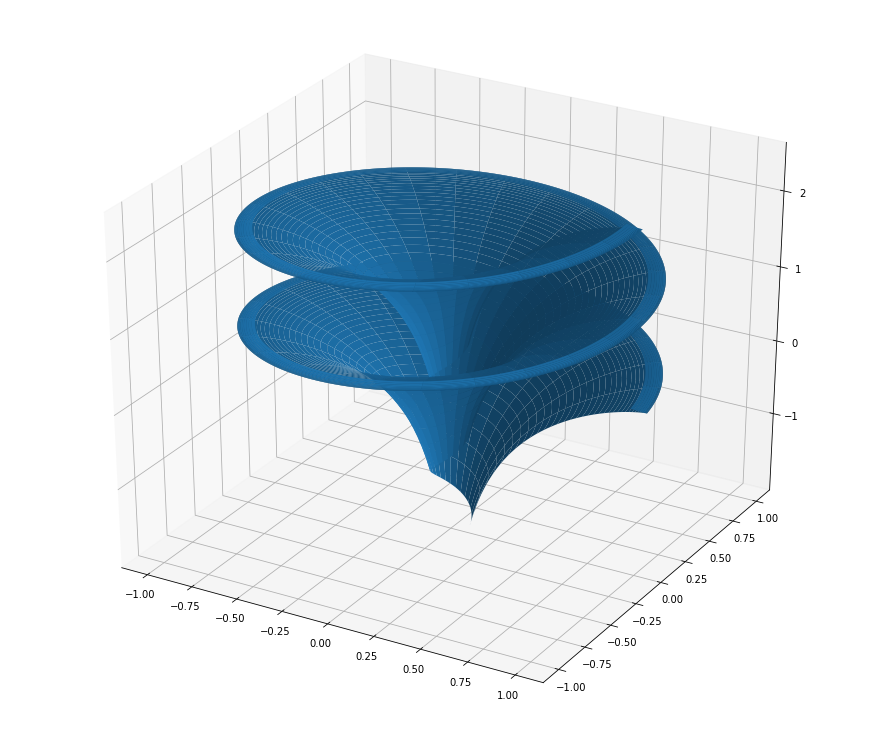

In [35]:
# Построим саму модель
import pylab
from mpl_toolkits.mplot3d import Axes3D
import numpy

def makeData ():
    u = numpy.arange (0.1, 4*pi, 0.01) # Задаем размерность u как последовательность от 0.1 до 4 π с интервалом 0.01
    v = numpy.arange (0.1, 2, 0.02) # Задаем размерность v как последовательность от 0.1 до 2 с интервалом 0.02
    ugrid, vgrid = numpy.meshgrid(u, v) # Преобразуем числа в систему координат
    xgrid = a * numpy.cos(ugrid) * numpy.sin(vgrid) # Расчитываем по формуле Х
    ygrid = a * numpy.sin(ugrid) * numpy.sin(vgrid) # Расчитываем по формуле Y
    zgrid =  a * (numpy.cos(vgrid) + numpy.log(numpy.tan(vgrid/2)) + b * ugrid) # Расчитываем по формуле Z 
    return xgrid, ygrid, zgrid

x, y, z = makeData() # Генерируем данные 

fig = pylab.figure(figsize = (12,10))
axes = Axes3D(fig) # Создаем трехмерную плоскость  и настраиваем размер рисунка

axes.plot_surface(x, y, z)

pylab.show() # отображаем

In [36]:
# НА ЭТОТ КОД НЕ ОБРАЩАЙТЕ ВНИМАНИЯ, ЭТО ВСЕГО ЛИШЬ РАЗМЕТКА ДОКУМЕНТА. ПОСТАВИЛ ДЛЯ УДОБСТВА ПРИВЫЧНЫЙ TIMES NEW ROMAN,
# НАСТРОИЛ ОТСТУПЫ И Т.Д.
from IPython.core.display import HTML
HTML("""
<style>

div.cell { /* Tunes the space between cells */
margin-top:1em;
margin-bottom:1em;
}

div.text_cell_render h1 { /* Main titles bigger, centered */
font-size: 1.6em;
line-height:1.2em;
text-align:center;
}

div.text_cell_render h2 { /*  Parts names nearer from text */
margin-bottom: -0.4em;
}


div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.4em;
line-height:1.2em;
padding-left:2em;
padding-right:2em;
text-align:justify;
text-indent:1.5em;
}
</style>
""")